### Project Overview

This project aims to address the pervasive issue of misinformation by developing a predictive model to identify fake news. The dataset used consists of news articles with columns for Title, Text, and Label (Fake or Real). This dataset provides a foundation for building models that can enhance information integrity, combat fake news, and promote media literacy.

### Understanding the Dataset

The dataset contains news articles labeled as either Fake or Real. By analyzing the text and title of these articles, we can develop a model to predict whether a given news article is fake or real. This can help in filtering out misinformation and ensuring that readers have access to reliable information.

### Exploratory Data Analysis (EDA)

To understand the dataset better, we performed several EDA steps:
1. **Word Cloud Visualization**: Word clouds were generated for both fake and real news articles to identify the most frequently occurring words. This helps in understanding common themes and language patterns in fake and real news.
   - **Fake News**: Often contains sensational and controversial terms.
   - **Real News**: Focuses more on factual reporting and legitimate political events.
   
### Model Selection

We chose to use a Logistic Regression model for this project for several reasons:
1. **Simplicity and Interpretability**: Logistic Regression is a straightforward and interpretable model, making it easy to understand how it distinguishes between fake and real news.
2. **Effectiveness for Binary Classification**: Logistic Regression is well-suited for binary classification tasks, such as predicting whether a news article is fake or real.
3. **Performance**: Logistic Regression performs well with textual data, especially when combined with feature extraction techniques like TF-IDF.

### Model Evaluation

To evaluate the model's performance, we used various metrics:
1. **Confusion Matrix**: Provides insights into the number of correct and incorrect predictions.
2. **ROC Curve and AUC**: Illustrates the model's ability to distinguish between classes, with an AUC of 0.98 indicating excellent performance.
3. **Classification Report**: Summarizes precision, recall, and F1-scores, showing a balanced performance in predicting both fake and real news.

### Conclusion

By combining EDA with effective modeling techniques, this project demonstrates a robust approach to identifying fake news. The insights gained from word clouds and the high performance of the Logistic Regression model highlight the potential of data-driven solutions in combating misinformation.

In [2]:
#Install the WordCloud library
!pip install wordcloud

#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

## Loading the Dataset

In [3]:
# Load the dataset

news_df = pd.read_csv("news.csv")

# Display the first few rows of the dataset
news_df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


## Inspecting the Data

In [4]:
# Inspect the dataset structure and types
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [5]:
news_df.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [6]:
# Summary statistics
news_df.describe()

,Unnamed: 0
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


In [7]:
print(news_df['label'].value_counts())

REAL    3171
FAKE    3164
Name: label, dtype: int64


## Checking for Missing Value and its Treatment

In [8]:
# Check for missing values
missing_values = news_df.isnull().sum()
print(missing_values)

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64


## Visualization

Label Distribution

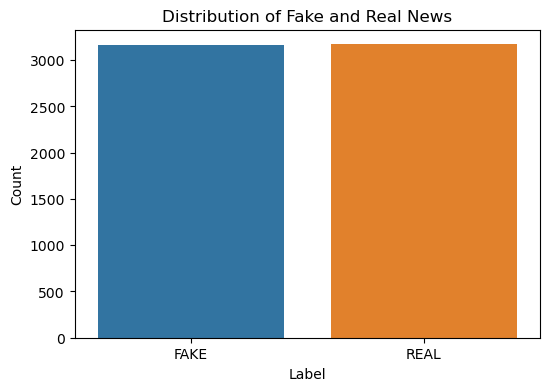

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of the labels
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=news_df)
plt.title('Distribution of Fake and Real News')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

Word Clouds

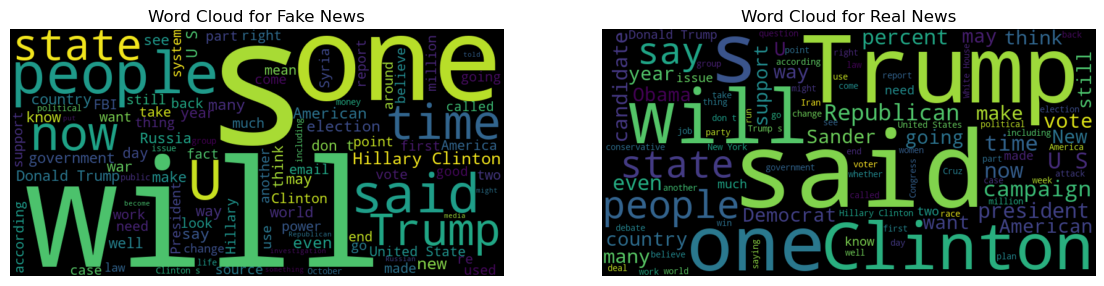

In [10]:
from wordcloud import WordCloud

# Generate word cloud for fake news
fake_news_text = ' '.join(news_df[news_df['label'] == 'FAKE']['text'])
fake_wordcloud = WordCloud(width=800, height=400, max_words=100).generate(fake_news_text)

# Generate word cloud for real news
real_news_text = ' '.join(news_df[news_df['label'] == 'REAL']['text'])
real_wordcloud = WordCloud(width=800, height=400, max_words=100).generate(real_news_text)

# Plot word clouds
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.imshow(fake_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Fake News')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(real_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Real News')
plt.axis('off')

plt.show()

### Insights from the Word Clouds

1. **Common Themes**: Both fake and real news frequently mention political figures like "Trump" and "Clinton," reflecting their high coverage.

2. **Sensational Language in Fake News**: Fake news often includes sensational and controversial terms such as "FBI," "Russia," "power," and "government," suggesting a focus on conspiracy theories and provocative topics.

3. **Fact-Based Reporting in Real News**: Real news emphasizes factual reporting with words like "campaign," "president," "vote," and "Republican," indicating a focus on legitimate political events and processes.

4. **Emotional vs. Factual Tone**: Fake news uses more emotional and uncertain language ("may," "want," "believe"), while real news uses straightforward terms ("said," "one," "will").

##  Text Preprocessing

In [11]:
# Function to clean text
def clean_text(text):
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'\W', ' ', text)  # Remove non-alphanumeric characters
    text = text.lower()  # Convert to lowercase
    return text

news_df['text'] = news_df['text'].apply(clean_text)

##  Splitting the Data

In [12]:
# Split the data into training and testing sets
X = news_df['text']
y = news_df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##  Model Building

Using TF-IDF and Logistic Regression

In [13]:
# Create a pipeline with TF-IDF and Logistic Regression
model = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('lr', LogisticRegression())
])

# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=5000)),
                ('lr', LogisticRegression())])

##  Model Evaluation

In [14]:
# Predict the labels for the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9187056037884768
Classification Report:
               precision    recall  f1-score   support

        FAKE       0.91      0.93      0.92       628
        REAL       0.93      0.91      0.92       639

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267

Confusion Matrix:
 [[582  46]
 [ 57 582]]


## Visualizing Model's Performance

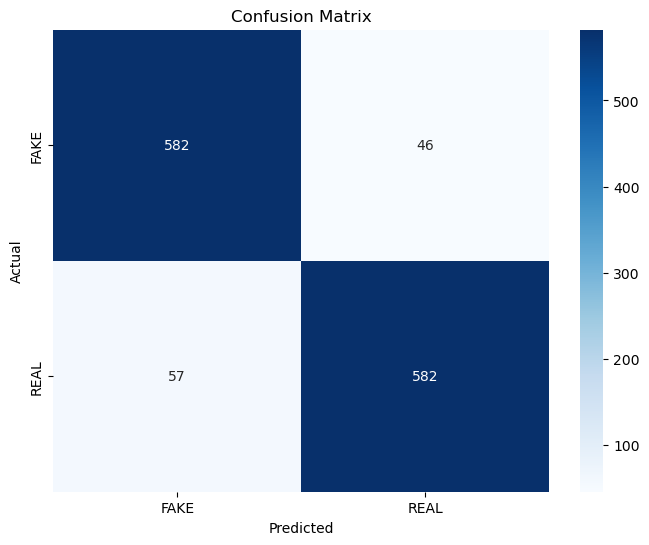

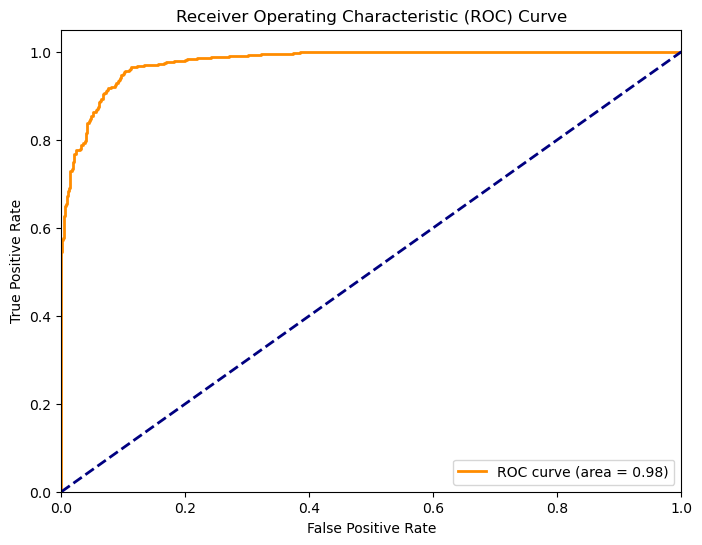

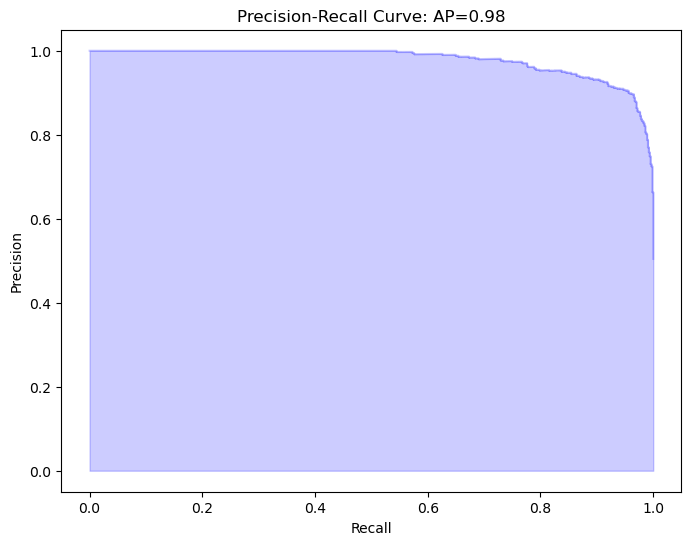

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['FAKE', 'REAL'], yticklabels=['FAKE', 'REAL'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve and AUC
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test.map({'FAKE': 0, 'REAL': 1}), y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test.map({'FAKE': 0, 'REAL': 1}), y_pred_proba)
average_precision = average_precision_score(y_test.map({'FAKE': 0, 'REAL': 1}), y_pred_proba)
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve: AP={0:0.2f}'.format(average_precision))
plt.show()

### Model Evaluation Summary


- **Accuracy**: 91.87%
- **ROC AUC**: 0.98 (indicates excellent classification ability)

Here is a summary of what the visualizations tell us:

1. **Confusion Matrix**:
   - True Positives (Fake correctly identified as Fake): 582
   - False Positives (Real incorrectly identified as Fake): 46
   - False Negatives (Fake incorrectly identified as Real): 57
   - True Negatives (Real correctly identified as Real): 582

2. **ROC Curve**:
   - The ROC curve shows the trade-off between the true positive rate (sensitivity) and the false positive rate (1-specificity). 
   - The area under the ROC curve (AUC) is 0.98, which indicates that the model has excellent discriminative ability between the two classes.

### Conclusion

- **Model Performance**: The model performs well with an accuracy of 91.87% and an AUC of 0.98, indicating that it is highly capable of distinguishing between fake and real news.
- **Precision and Recall**: Both precision and recall are high for both classes, indicating that the model is reliable in predicting both fake and real news.
- **Balanced Performance**: The F1-scores for both classes are 0.92, showing balanced performance without significant bias towards either class.